In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df=pd.read_csv('train.csv')
print(bike_df.shape) #10886갸의 레코드, 12개의 칼럼
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [46]:
bike_df.info()
#칼럼마다의 데이터형태와 null값 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [47]:
#datetime을 년도, 월, 일, 시간 속성으로 분리
#그러기 위해선 문자열을 'datetime'형태로 변경해야함
#pandas에서 제공하는 apply(pd.to_datetime) 메서드 이용

#일단 문자열 datetime 형태로 변경
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)
#bike 데이터프레임에 year이라는 열을 추가해서 year뽑아내기
bike_df['year']=bike_df.datetime.apply(lambda x: x.year) #datetime 열에 있는 value들을 전부 x로!
bike_df['month']=bike_df.datetime.apply(lambda x: x.month)
bike_df['day']=bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x: x.hour)

In [48]:
#datetime항목 삭제 및 불필요한 피처들 삭제
drop_columns=['datetime', 'casual', 'registered'] #삭제 할 열들 리스트 형태로 저장
bike_df.drop(drop_columns, axis=1, inplace=True) #inplace=True > 기존 데이터프레임 변경
bike_df
#컬럼들을 axis=1 방향으로 삭제

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


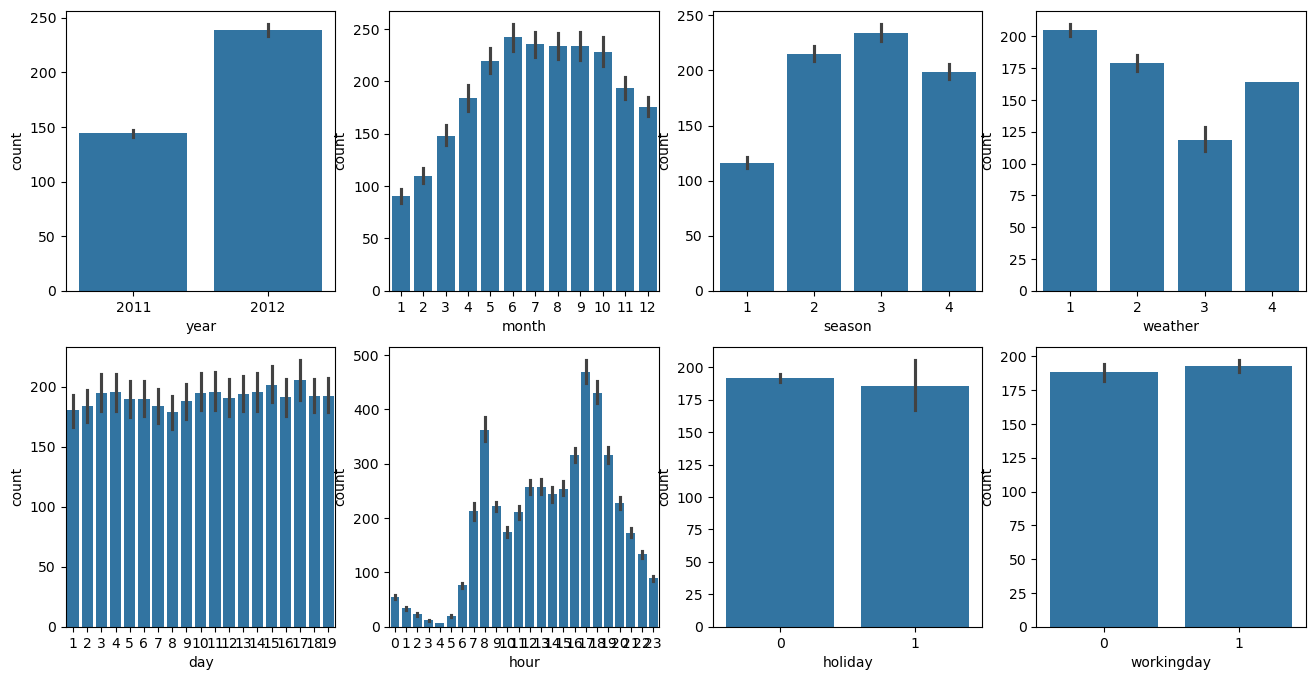

In [50]:
#주요 칼럼별로 count가 어떻게 분포되어 있는지 시각화
fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2) #(2,4)의 형태로 플롯 그려주시오
cat_features=['year','month','season','weather','day','hour','holiday','workingday']
for i, feature in enumerate(cat_features): #인덱스값과 feature 같이 반환
    row=int(i/4) #각 피쳐들 몇행?
    col=i%4 # 각 피쳐들 몇열?
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#log 값 변환 시 NaN 등의 이슈로 log1p를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred) ** 2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val=rmsle(y,pred)
    rmse_val=rmse(y,pred)
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
#회귀 모델 이용 자전거 대여 횟수 예측
#그전에 결괏값=정규분포?, 카테코리형 > 원 핫 인코딩 피처 

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1, inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE:1.165, RMSE:140.900, MAE:105.924


C:\Users\USER\AppData\Local\Temp\ipykernel_4032\2668941508.py:6: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [62]:
def get_top_error_data(y_test,pred,n_tops=5): 
    result_df=pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)
#너무 큰디... Target 값의 분포를 보자

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

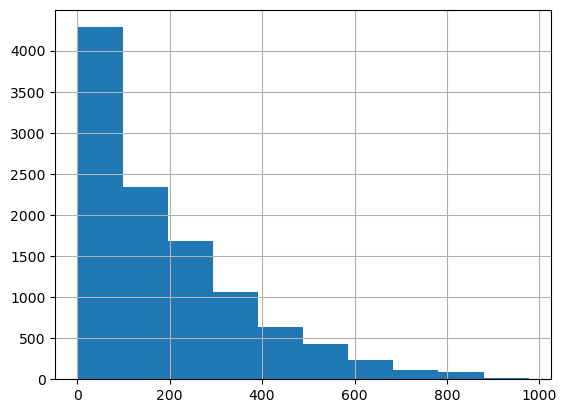

In [63]:
y_target.hist() #정규분포 따르는지 확인

<Axes: >

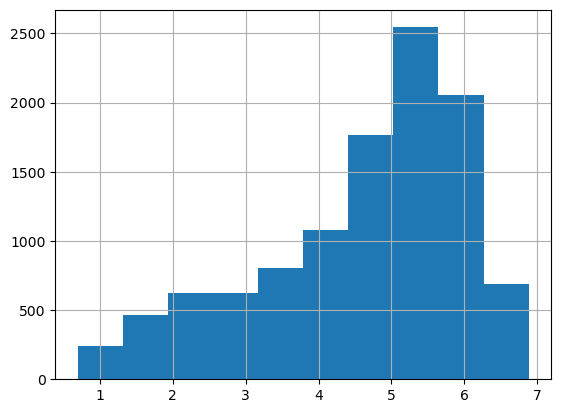

In [65]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [67]:
y_target_log=np.log1p(y_target)
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target_log, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

y_test_exp=np.expm1(y_test)
pred_exp=np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE:1.017, RMSE:162.594, MAE:109.286


<Axes: ylabel='None'>

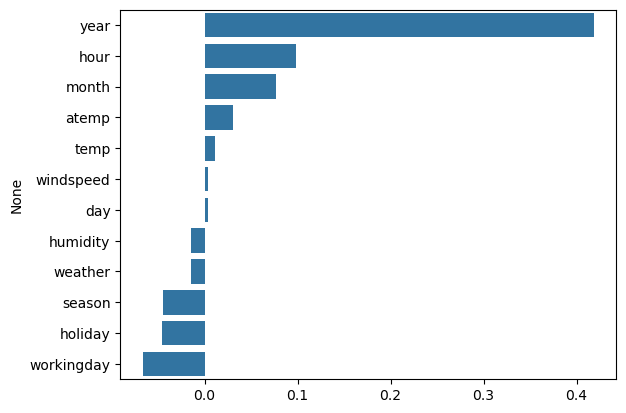

In [69]:
#각 피처의 회귀 계숫값을 시각화
coef=pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
#숫자형 카테고리는 회귀 계수를 연산할 떄 이숫자형 값에 크게 영향을 받음 > 원핫 인코딩

In [76]:
#one-hot encoding
X_features_ohe=pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])
#get_dummies함수를 이용해 원핫 인코딩 진행.
X_train,X_test,y_train,y_test=train_test_split(X_features_ohe,y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    if is_expm1:
        y_test=np.expm1(y_test)
        pred=np.expm1(pred)
    print('###',model.__class__.__name__,'###') #클래스 이름 문자열로 가져오기
    evaluate_regr(y_test,pred)

In [77]:
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)

### LinearRegression ###
RMSLE:0.590, RMSE:97.690, MAE:63.383
### Ridge ###
RMSLE:0.590, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSE:113.219, MAE:72.803


<Axes: ylabel='None'>

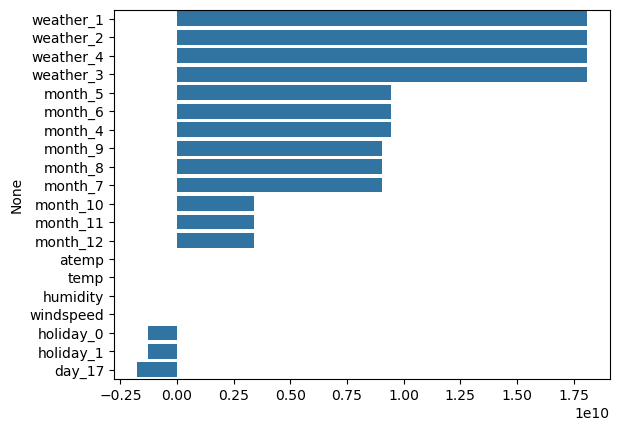

In [78]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [81]:
#회귀 트리 이용 성능예측
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgb_reg=XGBRegressor(n_estimators=500)
lgbm_reg=LGBMRegressor(n_estimators=500)
for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)